# Análise: Chegada de Turistas Internacionais

## Resumo
O presente estudo, tem como finalidade, analisar a chegada de turistas internacionais, nos estados do nordeste, durantes os anos de 2018, 2019, 2020 e 2021. A abrupta diminuição do turismo neste período, é efeito dos impactos gerados pela pandemia da COVID19. Nosso objetivo é correlacionar esses dados com o número de casos de COVID no nordeste.

Este notebook faz parte do projeto de conclusão do módulo 3: Técnicas de Programação, oferecido pela Let's Code from Ada, para o programa Diversidade Tech, em parceria com a Suzano. 

## Fonte dos Dados
Os dados foram retirados do Anuário Estatístico do Turismo do site do Ministério do Turismo: 

https://www.gov.br/turismo/pt-br/acesso-a-informacao/acoes-e-programas/observatorio/anuario-estatistico

## Importação de Bibliotecas

In [375]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly import subplots

## Dados do Turismo

In [376]:
# Leitura das bases da chegada de turistas internacionais no nordeste

turismo_18 = pd.read_csv('chegada-turistas-internacionais-nordeste_2018.csv')
turismo_19 = pd.read_csv('chegada-turistas-internacionais-nordeste_2019.csv')
turismo_20 = pd.read_csv('chegada-turistas-internacionais-nordeste_2020.csv')
turismo_21 = pd.read_csv('chegada-turistas-internacionais-nordeste_2021.csv')

In [377]:
# Mesclando as bases com o merge

turismo_18_19 = pd.merge(turismo_18, turismo_19, how='outer')
turismo_20_21 = pd.merge(turismo_20, turismo_21, how='outer')
turismo_18_19_20_21 = pd.merge(turismo_18_19, turismo_20_21, how='outer').dropna()
turismo_18_19_20_21

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Bahia,5,Aérea,1,2018,janeiro,1,1
1,África,1,Angola,6,Bahia,5,Aérea,1,2018,janeiro,1,2
2,África,1,Cabo Verde,35,Bahia,5,Aérea,1,2018,janeiro,1,0
3,África,1,Egito,60,Bahia,5,Aérea,1,2018,janeiro,1,0
4,África,1,Gana,77,Bahia,5,Aérea,1,2018,janeiro,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31243,Continente não especificado,8,Países não especificados,999,Rio Grande do Norte,20,Marítima,3,2021,agosto,8,0
31244,Continente não especificado,8,Países não especificados,999,Rio Grande do Norte,20,Marítima,3,2021,setembro,9,0
31245,Continente não especificado,8,Países não especificados,999,Rio Grande do Norte,20,Marítima,3,2021,outubro,10,0
31246,Continente não especificado,8,Países não especificados,999,Rio Grande do Norte,20,Marítima,3,2021,novembro,11,0


## Salvando a Base Completa

In [378]:
turismo_18_19_20_21.to_csv(
    'chegada-turistas-internacionais-nordeste_2018-2019-2020-2021.csv', 
    index=False
)

## Análise Exploratória

 - ### Universo amostral: 

In [379]:
turismo_18_19_20_21['Chegadas'].sum()

940815

In [380]:
turismo_18_19_20_21['Continente'].unique().tolist()

['África',
 'América Central e Caribe',
 'América do Norte',
 'América do Sul',
 'Ásia',
 'Europa',
 'Oceania',
 'Continente não especificado']

In [381]:
turismo_18_19_20_21['ano'].unique().tolist()

[2018, 2019, 2020, 2021]

In [382]:
turismo_18_19_20_21['UF'].unique().tolist()

['Bahia', 'Ceará', 'Pernambuco', 'Rio Grande do Norte']

In [383]:
turismo_18_19_20_21['Via'].unique().tolist()

['Aérea', 'Marítima']

## Relacionando Elementos da Base: 
 - ### Relacionando uma variável com o número de chegada:

In [384]:
# Relação da chegada de turistas pelos estados do nordeste:

chegada_estado = turismo_18_19_20_21.groupby(['UF'])['Chegadas'].sum().reset_index()
chegada_estado

,UF,Chegadas
0,Bahia,349589
1,Ceará,259656
2,Pernambuco,264473
3,Rio Grande do Norte,67097


In [385]:
# Relação da chegada de turistas por ano:

chegada_ano = turismo_18_19_20_21.groupby(['ano'])['Chegadas'].sum().reset_index()
chegada_ano

,ano,Chegadas
0,2018,405898
1,2019,404949
2,2020,95722
3,2021,34246


In [386]:
# Relação da chegada de turistas pelos meses:

chegada_mes = turismo_18_19_20_21.groupby(['cod mes', 
                           'Mês'])['Chegadas'].sum().reset_index()
chegada_mes

,cod mes,Mês,Chegadas
0,1,janeiro,127913
1,2,fevereiro,119875
2,3,março,76266
3,4,abril,50170
4,5,maio,29830
5,6,junho,38969
6,7,julho,66460
7,8,agosto,72664
8,9,setembro,67935
9,10,outubro,73198


In [387]:
# Relação da chegada de turistas por via de transporte:

chegada_via = turismo_18_19_20_21.groupby(['Via'])['Chegadas'].sum().reset_index()
chegada_via

,Via,Chegadas
0,Aérea,891618
1,Marítima,49197


In [388]:
# Relação da chegada de turistas pelos continentes:

chegada_continente = turismo_18_19_20_21.groupby(['cod continente', 
                            'Continente'])['Chegadas'].sum().reset_index()
chegada_continente

,cod continente,Continente,Chegadas
0,1,África,5593
1,2,América Central e Caribe,2576
2,3,América do Norte,50681
3,4,América do Sul,361455
4,5,Ásia,4971
5,6,Europa,514030
6,7,Oceania,1507
7,8,Continente não especificado,2


In [389]:
# Relação da chegada de turistas pelo país:

chegada_pais = turismo_18_19_20_21.groupby(['País'])['Chegadas'].sum().reset_index()
chegada_pais

,País,Chegadas
0,Alemanha,70512
1,Angola,121
2,Argentina,322821
3,Arábia Saudita,19
4,Austrália,1261
...,...,...
84,Uruguai,15694
85,Venezuela,906
86,África do Sul,321
87,Áustria,6365


- ### Relacionando duas variáveis com o número de chegada:

In [390]:
# Relação da chegada de turistas em cada estado por ano:

chegada_estado_ano = turismo_18_19_20_21.groupby(['UF', 
                'ano'])['Chegadas'].sum().reset_index()
chegada_estado_ano

,UF,ano,Chegadas
0,Bahia,2018,148637
1,Bahia,2019,152221
2,Bahia,2020,41201
3,Bahia,2021,7530
4,Ceará,2018,107420
5,Ceará,2019,112920
6,Ceará,2020,22271
7,Ceará,2021,17045
8,Pernambuco,2018,121169
9,Pernambuco,2019,111920


In [391]:
# Relação da chegada de turistas com cada estado por via de transporte:

chegada_estado_via = turismo_18_19_20_21.groupby(['UF', 
                'Via'])['Chegadas'].sum().reset_index()
chegada_estado_via

,UF,Via,Chegadas
0,Bahia,Aérea,331547
1,Bahia,Marítima,18042
2,Ceará,Aérea,249834
3,Ceará,Marítima,9822
4,Pernambuco,Aérea,245028
5,Pernambuco,Marítima,19445
6,Rio Grande do Norte,Aérea,65209
7,Rio Grande do Norte,Marítima,1888


In [392]:
# Relação da chegada de turistas pelos meses de cada ano:

chegada_ano_mes = turismo_18_19_20_21.groupby(['cod mes', 
            'Mês', 'ano'])['Chegadas'].sum().reset_index()
chegada_ano_mes

,cod mes,Mês,ano,Chegadas
0,1,janeiro,2018,44484
1,1,janeiro,2019,45401
2,1,janeiro,2020,35104
3,1,janeiro,2021,2924
4,2,fevereiro,2018,39328
5,2,fevereiro,2019,43585
6,2,fevereiro,2020,36882
7,2,fevereiro,2021,80
8,3,março,2018,34079
9,3,março,2019,28489


## Análise Gráfica

In [393]:
# Para garantir que nossos gráficos vão ser plotados 
# em todas as versões do Jupyter Notebook precisamos 
# rodar o comando abaixo:

%matplotlib inline

### _1_. Chegada de turistas em cada estado

#### _1.1.1_. Plotando gráfico de barra com o Plotly:

In [422]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados em cada estado 

fig = go.Figure()

fig.add_trace(go.Bar(
    x = chegada_estado['UF'], 
    y = chegada_estado['Chegadas'],
    name = 'Chegada de Turistas por Estado'
))

fig.show()

#### _1.1.2_. Plotando gráfico de pizza com o Plotly:

In [423]:
# gráfico de pizza retratando o percentual do número
# total de turistas desembarcados em cada estado 

fig=px.pie(
    names= chegada_estado['UF'], 
    values = chegada_estado['Chegadas']
    )
fig.show()

#### _1.2_. Plotando gráfico com matplotlib:

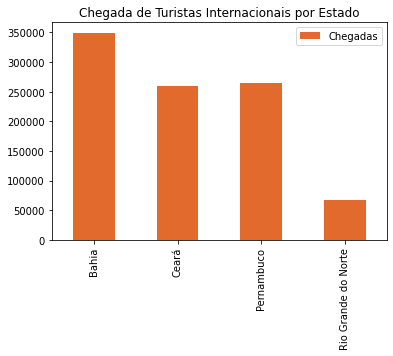

In [424]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados em cada estado 

chegada_estado.plot(
    title='Chegada de Turistas Internacionais por Estado', 
    kind='bar', 
    color= ['#e26a2c'],
    x ='UF', xlabel='', 
    y = ['Chegadas'], ylabel='');

### _2_. Chegada de turistas no nordeste em cada ano

In [425]:
# Convertendo dados da colune 'ano' para string
chegada_ano['ano'] = chegada_ano['ano'].astype(str)

#### _2.1.1_. Plotando gráfico de barra com o Plotly:

In [426]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados por ano 

fig = go.Figure()

fig.add_trace(go.Bar(
    x = chegada_ano['ano'], 
    y = chegada_ano['Chegadas']
))

fig.show()

#### _2.1.2_. Plotando gráfico de pizza com o Plotly:

In [427]:
# gráfico de pizza retratando o percentual do 
# número total de turistas desembarcados por ano

fig=px.pie(
    names= chegada_ano['ano'], 
    values = chegada_ano['Chegadas']
)
fig.show()

#### _2.2_. Plotando gráfico com o Matplotlib:

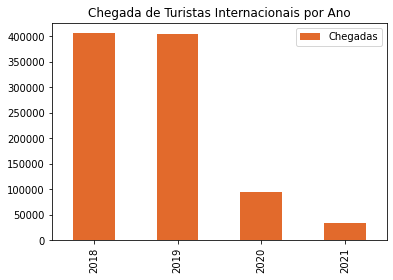

In [428]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados por ano 

chegada_ano.plot(
    title='Chegada de Turistas Internacionais por Ano', 
    kind='bar', 
    color= ['#e26a2c'],
    x ='ano', xlabel='', 
    y = ['Chegadas'], ylabel='');

### _3_. Chegada de turistas no nordeste em cada mês

#### _3.1.1_. Plotando gráfico de barra com o Plotly:

In [429]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados em cada mês

fig = go.Figure()

fig.add_trace(go.Bar(
    x = chegada_mes['Mês'], 
    y = chegada_mes['Chegadas']
))

fig.show()

#### _3.1.2_. Plotando gráfico de pizza com o Plotly:

In [430]:
# gráfico de pizza retratando o percentual do número 
# total de turistas desembarcados em cada mês 

fig=px.pie(
    names= chegada_mes['Mês'], 
    values = chegada_mes['Chegadas']
    )
fig.show()

#### _3.2_. Plotando gráfico com o Matplotlib:

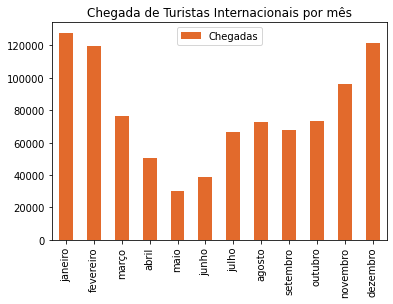

In [431]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados em cada mês

chegada_mes.plot(
    title='Chegada de Turistas Internacionais por mês', 
    kind='bar', 
    color= ['#e26a2c'],
    x ='Mês', xlabel='',  
    y = ['Chegadas'], ylabel='');

### _4_. Chegada de turistas no nordeste por via

#### _4.1.1_. Plotando gráfico de barra com o Plotly:

In [432]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados por via de transporte

fig = go.Figure()

fig.add_trace(go.Bar(
    x = chegada_via['Via'], 
    y = chegada_via['Chegadas']
))

fig.show()

#### _4.1.2_. Plotando gráfico de pizza com o Plotly:

In [433]:
# gráfico de pizza retratando o percentual do número 
# total de turistas desembarcados por via 

fig=px.pie(
    names= chegada_via['Via'], 
    values = chegada_via['Chegadas']
    )
fig.show()

#### _4.2_. Plotando gráfico com o Matplotlib:

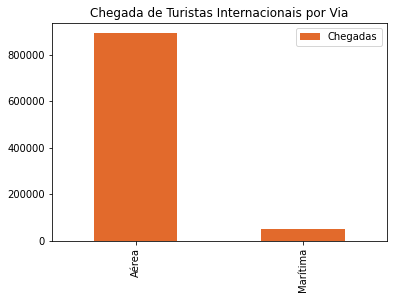

In [434]:
# gráfico de barra retratando a relção do número 
# total de turistas desembarcados por via de transporte

chegada_via.plot(
    title='Chegada de Turistas Internacionais por Via', 
    kind='bar',
    color= ['#e26a2c'], 
    x ='Via', xlabel='', 
    y = ['Chegadas'], ylabel='');

### _5_. Chegada de turistas no nordeste por continente

#### _5.1.1_. Plotando gráfico de barra com o Plotly:

In [435]:
# gráfico de barra retratando a relção do número total 
# de turistas desembarcados no nordeste por continente 

fig = go.Figure()

fig.add_trace(go.Bar(
    x = chegada_continente['Continente'], 
    y = chegada_continente['Chegadas']
))

fig.show()

#### _5.1.2_. Plotando gráfico de pizza com o Plotly:

In [436]:
# gráfico de pizza retratando o percentual do número 
# total de turistas desembarcados por continente 

fig=px.pie(
    names= chegada_continente['Continente'], 
    values = chegada_continente['Chegadas']
   )
fig.show()

#### _5.2_. Plotando gráfico com o Matplotlib:

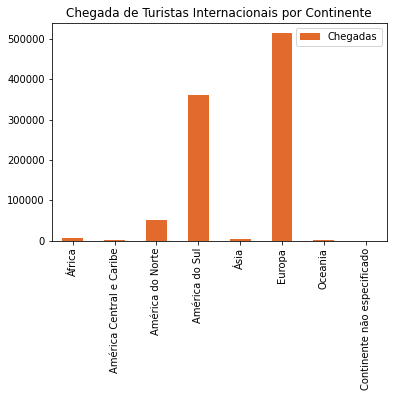

In [437]:
# gráfico de barra retratando a relção do número total 
# de turistas desembarcados no nordeste por continente 

chegada_continente.plot(
    title='Chegada de Turistas Internacionais por Continente', 
    kind='bar',
    color= ['#e26a2c'],
    x ='Continente', xlabel='', 
    y = ['Chegadas'], ylabel='');

## Relacionando Vários Elementos da Base

In [438]:
# Leitura da base que relacioana o número total 
# de turistas que chegam em cada estado do 
# nordeste por ano de chegada

turismo_estado_ano = pd.read_csv('turismo-internacional-estado.csv')
turismo_estado_ano

,Estado,2018,2019,2020,2021
0,Bahia,148637,152221,41201,7530
1,Ceará,107420,112920,22271,17045
2,Pernambuco,121169,111920,23734,7650
3,Rio Grande do Norte,28672,27888,8516,2021


- ### Análise Gráfica

In [439]:
# gráfico para analizar chegada de turistas 
# nos estados do nordeste em cada ano

trace1 = go.Bar(x = turismo_estado_ano['Estado'],
                y = turismo_estado_ano['2018'],
                name = '2018',
                marker = {'color': '#ff9f43'})
trace2 = go.Bar(x = turismo_estado_ano['Estado'],
                y = turismo_estado_ano['2019'],
                name = '2019',
                marker = {'color': '#e67e22'})
trace3 = go.Bar(x = turismo_estado_ano['Estado'],
                y = turismo_estado_ano['2020'],
                name = '2020',
                marker = {'color': '#ff8243'})
trace4 = go.Bar(x = turismo_estado_ano['Estado'],
                y = turismo_estado_ano['2021'],
                name = '2021',
                marker = {'color': '#e74c3c'})
data = [trace1, trace2, trace3, trace4]
py.iplot(data)

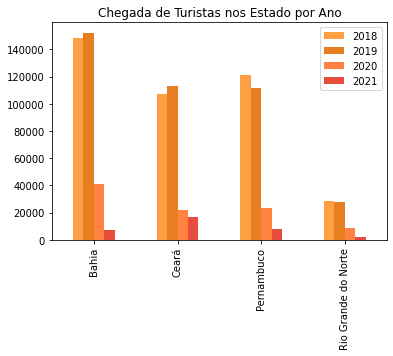

In [440]:
turismo_estado_ano.plot(
    title='Chegada de Turistas nos Estado por Ano', 
    kind='bar', 
    color= ['#ff9f43', '#e67e22', '#ff8243','#e74c3c'],
    x ='Estado', xlabel='', 
    y = ['2018', '2019', '2020', '2021'], ylabel='');

## Correlação

In [441]:
# Correlação com o número de turistas e o ano
chegada_estado_ano.corr()

,ano,Chegadas
ano,1.000000,-0.740154
Chegadas,-0.740154,1.000000


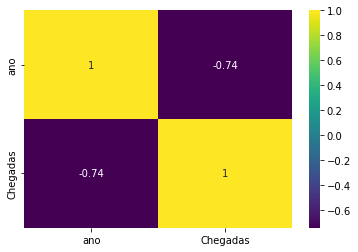

In [442]:
sns.heatmap(chegada_estado_ano.corr(), cmap='viridis', annot=True);

### Chegada de turistas internacionais durante a pandemia da COVID:

A partir das análises feitas com os dados da chegada de turistas internacionais, nos estados do nordeste, durantes os anos de 2018 até 2021, existe uma notável redução no número de chegada entre os anos de 2020 e 2021, período em que se iniciou a pandemia. 

Neste caso, o número de turistas internacionais desembarcados nos estados do nordeste está inversamente correlacionado com o número de casos notificados da COVID. Isto é, com o aumento dos casos de COVID no nordeste, há uma diminuição do turismo internacional para estes estados.